In [177]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time

from scipy.interpolate import CubicSpline

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [204]:
path_array = [r"C:/Users/nicol/Experimentel Physics/Experimentel-Physics-2/Mach-Zender/Refractive index", 
              r"/Users/karsten/eksperimental/Experimentel-Physics-2/Mach-Zender/Refractive index"]

def get_data(entries):
    data = io.loadmat(path_array[0] + entries)
        
    length = data.get("Length")[0][0]
    Tinterval = data.get("Tinterval")[0][0]
    Tstart = data.get("Tstart")[0][0]
    
    t = np.arange(Tstart, Tinterval*length, Tinterval)
    V = np.transpose(data.get("A"))[0]
    
    return t, V

t05, V05 = get_data(r"/0.5 bar.mat")
t1, V1 = get_data(r"/1 bar.mat")
t15, V15 = get_data(r"/1.5 bar.mat")
t2, V2 = get_data(r"/2 bar.mat")
                    

Text(0.5, 1.01, 'Measured intensity during pressure drop')

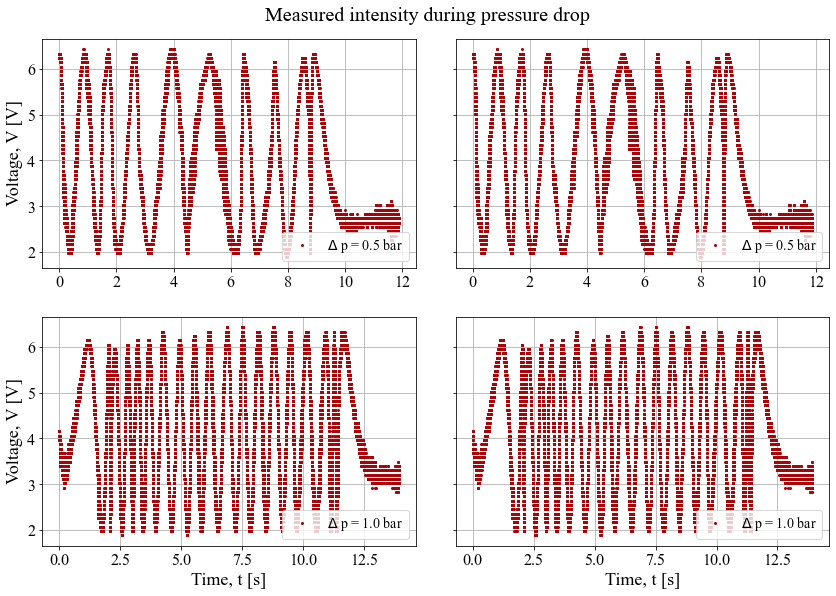

In [205]:
fig, ax = plt.subplots(2, 2, sharey = True, figsize=(12,8))
fig.tight_layout(pad=2.0)

tsize = 14

tV = [[t05, V05], [t1, V1], [t15, V15], [t2, V2]]
dp = [0.5, 1.0, 1.5, 2.0]

track = 1
for array, tV_array, dp in zip(ax, tV, dp) : 
    for axs in array :
        axs.plot(tV_array[0], tV_array[1], '.', label="$\Delta$ p = {} bar".format(dp), color='#a90308', markersize=4)
        axs.legend(loc = 'lower right', prop={'size':14})
        axs.grid()
        if track == 3 or track == 4 :
            axs.set_xlabel("Time, t [s]")
        if track == 1 or track == 3 : 
            axs.set_ylabel("Voltage, V [V]")
        track += 1
    
fig.suptitle("Measured intensity during pressure drop", size = 20, y = 1.01)


59388 59388
<class 'scipy.interpolate._cubic.CubicSpline'>


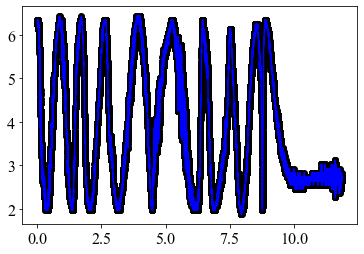

In [206]:
t05 = t05[0:len(t05):1]
V05 = V05[0:len(V05):1]

print(len(t05), len(V05))

cs = CubicSpline(t05, V05)

print(type(cs))

spline = cs(t05)

plt.plot(t05, V05, 'ko')
plt.plot(t05, spline, '-', color = 'blue')

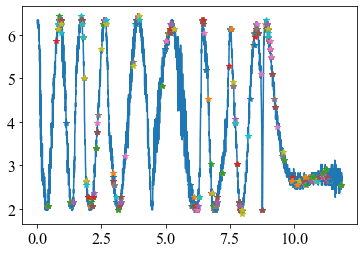

In [207]:
s_deriv = cs(t05, 1)

index = []
tolerance = 1e-8

for i, data in enumerate(s_deriv) : 
    if data < tolerance and data > -tolerance : 
        index.append(i)

plt.plot(t05, V05)
for i in index : 
    plt.plot(t05[i], V05[i], '*')


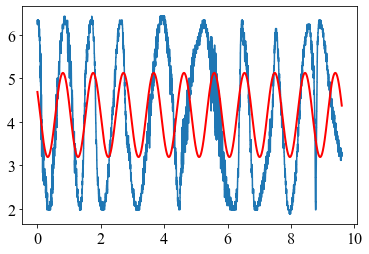

In [171]:
import numpy, scipy.optimize

t05 = t05[0:48000]
V05 = V05[0:48000]

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

res = fit_sin(t05, V05)

plt.plot(t05, V05)
plt.plot(t05, res["fitfunc"](t05), "r-", label="y fit curve", linewidth=2)



In [172]:
ary = [1,2,3,4,5,6]
print(ary[0:len(ary):2])

[1, 3, 5]
